# Promiscuous ligand-receptor binding

In this case study, we demonstrate how to use EQTK and be used to efficiently investigate promiscuous ligand-receptor binding. We use the term "promiscuous" because more than one ligand may bind a given receptor. Antebi, et al. ([*Cell*, 2017](http://dx.doi.org/10.1016/j.cell.2017.08.015)) studied this system in their paper on combinatorial signaling in the [bone morphogenetic protein signaling pathway](https://en.wikipedia.org/wiki/Bone_morphogenetic_protein).

We will specifically study what Antebi and coworkers refer to as the (2,2,2) system, in which each of two ligands may sequentially bind to one of two type A receptors and one of two type B receptors.

To start the analysis, we import Numpy and EQTK, and additionally [HoloViews](http://holoviews.org/) for plotting, also setting some nice defaults for the plots. We will also import [Numba](https://numba.pydata.org), which we will use to just-in-time compile our code.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
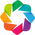

In [1]:
import numpy as np
import pandas as pd

import tqdm

import eqtk

import holoviews as hv
hv.extension('bokeh')

## The chemical reactions

For the (2, 2, 2) system, we consider two ligands, L₁ and L₂, two receptors of type A, A₁ and A₂, and two receptors of type B, B₁ and B₂. We could choose one set of chemical reactions,

\begin{align}
&\mathrm{D}_{ij} \rightleftharpoons \mathrm{A}_i + \mathrm{L}_j \\[1em]
&\mathrm{T}_{ijk} \rightleftharpoons \mathrm{D}_{ij} + \mathrm{B}_k,
\end{align}

for all combinations of $(i, j, k) \in (1, 2)$. Here, $\mathrm{D}_{ij}$ denotes a dimer $\mathrm{A}_i\cdot\mathrm{L}_j$ and $\mathrm{T}_{ijk}$ denotes a trimer $\mathrm{A}_i\cdot\mathrm{L}_j\cdot\mathrm{B}_k$. Note that we have stipulated than the ligand can only bind a type B receptor if it is already bound to a type A receptor, as did Antebi, et al. The concentration of the trimeric complex, $\mathrm{T}_{ijk}$ determines the strength of the signaling due to the ligand-receptor binding. The signal strength $S$ is given by

\begin{align}
S = \sum_{ijk} \epsilon_{ijk}\,[\mathrm{T}_{ijk}],
\end{align}

where $[\mathrm{T}_{ijk}]$ is the concentration of $\mathrm{T}_{ijk}$.

To mimic the situation in cell culture, in which cells sit at the bottom of a sea of solution containing ligands, we hold the concentration of ligands constant. We will therefore solve for the equilibrium concentrations using `eqtk.fixed_value_solve()`.

To compute all of the possible the chemical reactions, it is convenient to write a function to generate the reactions as strings.

In [2]:
def make_rxns(nA, nB, nL):
    rxns = ""
    # Dimer rxns
    for j in range(nL):
        for i in range(nA):
            rxns += f"A_{i+1} + L_{j+1} <=> D_{i+1}_{j+1}\n"

    # Trimer rxns
    for j in range(nL):
        for i in range(nA):
            for k in range(nB):
                rxns += f"D_{i+1}_{j+1} + B_{k+1} <=> T_{i+1}_{j+1}_{k+1}\n"

    return rxns

Using this function for the (2, 2, 2) system gives the following result.

In [3]:
nA = nB = nL = 2

print(make_rxns(nA, nB, nL))

A_1 + L_1 <=> D_1_1
A_2 + L_1 <=> D_2_1
A_1 + L_2 <=> D_1_2
A_2 + L_2 <=> D_2_2
D_1_1 + B_1 <=> T_1_1_1
D_1_1 + B_2 <=> T_1_1_2
D_2_1 + B_1 <=> T_2_1_1
D_2_1 + B_2 <=> T_2_1_2
D_1_2 + B_1 <=> T_1_2_1
D_1_2 + B_2 <=> T_1_2_2
D_2_2 + B_1 <=> T_2_2_1
D_2_2 + B_2 <=> T_2_2_2



These reactions are in the appropriate format for EQTK's reaction parser to generate a stoichiometric matrix $\mathsf{N}$ from the reactions. The `eqtk.parse_rxns()` function places the stoichiometric matrix in a data frame with the ordering of the columns given by the order in which the chemical species appear in the string containing the reactions. Because we will be doing thousands and thousands of solves as we explore parameter space, we will be using $\mathsf{N}$ as a Numpy arrays to save on the computational cost of creating and manipulating data frames in `eqtk.solve()`'s I/O. So, we should make $\mathsf{N}$ as a Numpy array where the first columns represent receptors of type A, the next columns represent receptors of type B, the next ligands, then dimers, and finally trimers. We can code this up in a function to make our stoichiometric matrix.

In [4]:
def make_N(nA, nB, nL):
    rxns = make_rxns(nA, nB, nL)
    N = eqtk.parse_rxns(rxns)

    # Sorted names
    names = sorted(N.columns, key=lambda s: (len(s), s))

    # Sorted columns
    N = N[names]

    # As a Numpy array
    return N.to_numpy(copy=True, dtype=float)

We can now build our stoichiometric matrix.

In [5]:
N = make_N(nA, nB, nL)

# Take a look
print(make_N(2, 2, 2))

[[-1.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0. -1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0. -1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0. -1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  1.]]


## The equilibrium coefficients

We need to specify the equilibrium constants for dimer formation and for trimer formation. We will perform an exploration of parameter space similar to that of Antebi, et al. They chose dimensionless units such that the following hold:

1. Defining $K_{ij}$ as the equilibrium constant for the formation of $\mathrm{D}_{ij}$, $\sum_{i}K_{ij} = 1$ for each ligand $j$.
2. Defining $K_{ijk}$ as the equilibrium constant for the formation of $\mathrm{T}_{ijk}$, $\sum_{ijk}K_{ijk} = 1$.

The equilibrium constants were then chosen out uniform distributions such that the above sum-to-one constraints are enforced. This is accomplished by choosing the equilibrium constants out of a Dirichlet distribution with all parameters set to one.

In [6]:
def make_K(nA, nB, nL):
    # Dimerization equilibrium constants
    K_dimer = np.concatenate([np.random.dirichlet(np.ones(nA)) for i in range(nL)])
    
    # Trimerization equilibrium constants
    K_trimer = np.random.dirichlet(np.ones(nA*nB*nL))
    
    return np.concatenate((K_dimer, K_trimer))

Let's compute a set of equilibrium constants so we can see how the array looks.

In [7]:
# Seed for reproducibility
np.random.seed(239486234)

K = make_K(nA, nB, nL)

K

array([0.6957962 , 0.3042038 , 0.43988853, 0.56011147, 0.01418418,
       0.18754634, 0.11632898, 0.21491361, 0.08621283, 0.21522578,
       0.14238907, 0.02319921])

In this case, the first four entries are for dimer formation and the last eight are for trimer formation.

## The initial concentrations

In exploring parameter space for the (2, 2, 2) system, Antebi, et al. varied the concentration of each of the two ligands over six orders of magnitude, from $10^{-3}$ to $10^3$ in dimensionless units. As they did, we will use 15 concentrations of each ligand over that interval. 

For each calculation, Antebi and coworkers chose random concentrations for each receptor from the log-uniform distribution on $[10^{-3}, 10^3]$.

We can write a function to make a set of initial concentrations satisfying these requirements. We need to hold these ligand concentrations constant for the calculation, so we also need to generate a `fixed_c` array, which has nonnegative concentrations for the ligand monomers and NaN's for all other species.

In [8]:
def make_c0_grid(nA, nB, nL, n):
    # Ligand concentrations
    cL0 = np.logspace(-3, 3, n)
    cL0 = np.meshgrid(*tuple([cL0]*nL))
    
    # Initialize c0 and fixed_c
    c0 = np.zeros((n**nL, nA + nB + nL + nA*nL + nA*nB*nL))
    fixed_c = np.zeros_like(c0) * np.nan

    # Add ligand concentrations
    for i in range(nL):
        c0[:, i+nA+nB] = cL0[i].flatten()
        fixed_c[:, i+nA+nB] = cL0[i].flatten()
    
    # Random concentrations of receptors
    for i in range(nA):
        c0[:, i] = 10**np.random.uniform(-3, 3)
    for i in range(nB):
        c0[:, i + nA] = 10**np.random.uniform(-3, 3)
        
    return c0, fixed_c

Let's generate `c0` and `fixed_c` arrays and take a look at their shape.

In [9]:
n = 15

c0, fixed_c = make_c0_grid(nA, nB, nL, n)

c0.shape

(225, 18)

There are 225 different sets of initial concentrations we solve for.

## The readout

The concentrations of the respective species are "read out" by the intensity of the intracellular signaling triggered by the ligand-receptor binding. The signal strength $S$ is given by

\begin{align}
S = \sum_{ijk} \epsilon_{ijk}\,[\mathrm{T}_{ijk}].
\end{align}

We can write a function to compute this from the parameters $\epsilon_{ijk}$ and concentrations returned by `eqtk.solve()`.

In [10]:
def readout(epsilon, c):
    return np.dot(epsilon, c[:, -len(epsilon):].transpose())

The choice of $\epsilon_{ijk}$ is drawn out of a uniform distribution subject to the contraint that $\sum_{ijk} \epsilon_{ijk} = 1$. We can again accomplish this by drawing out of a Dirichlet distribution.

In [11]:
def make_epsilon(nA, nB, nL):
    return np.random.dirichlet(np.ones(nA*nB*nL))

epsilon = make_epsilon(nA, nB, nL)

## Solve!

We now have all the ingredients to solve for the concentrations and compute the readout.

In [12]:
c = eqtk.fixed_value_solve(c0=c0, fixed_c=fixed_c, N=N, K=K)
s = readout(epsilon, c)

We can make a heat map of the readout as a function of ligand concentration, bearing in mind that the initial ligand concentrations are in columns 4 and 5 of `c0`.

In [13]:
hv.HeatMap(
    data=(c0[:,4], c0[:,5], s), 
    kdims=['L1', 'L2'],
    vdims=['S']
).opts(
    logx=True, 
    logy=True,
    logz=True,
    cmap='viridis',
    frame_height=200,
    frame_width=200,
    toolbar='above',
    xrotation=45,
    colorbar=True,
)

:HeatMap   [L1,L2]   (S)

## Rapid characterization of signaling behavior

Antebi et al. defined two summary parameters that can be computed from the above heat map. They considered only the regions of high ligand concentrations; that is the top row and rightmost column of the above heat map. They defined the following quantities:

| variable        | description           |
| ------------- |:-------------|
| $a$      | Signaling level of weaker ligand in absence of stronger ligand |
| $b$      | Signaling level of stronger ligand in absence of weaker ligand |
| $c$      | Maximum signal in the high-ligand concentration region of the heat map |
| $d$      | Minimum signal in the high-ligand concentration region of the heat map |

In the heat map above, L1 is the weaker ligand because at high ligand concentration, it has lower signaling. 

From these parameters, they defined the relative ligand strength, $\mathrm{RLS} = a/b$, which ranges from zero to one. They also defined the ligand interference coefficient, $\mathrm{LIC} = d/a - b/c$.

We will randomly select equilibrium constants, receptor concentrations, and readout magnitudes $\epsilon_{ijk}$ and compute the RLS and LIC. We can then make a plot of LIC vs. RLS.

To do this, we only need to compute equilibria in the high ligand concentration regime. So, let's write another function that will generate `c0` only for that regime.

In [14]:
def make_c0_high_ligand(nA, nB, nL, n):
    if nL != 2:
        raise ValueError("Only defined for the two-ligand problem.")

    # Initialize c0 and fixed_c
    c0 = np.zeros((2 * n, nA + nB + nL + nA * nL + nA * nB * nL))
    fixed_c = np.zeros_like(c0) * np.nan

    # Ligand concentrations
    cL10 = np.concatenate([[0], np.logspace(-3, 3, n), [1e3] * (n - 1)])
    cL20 = np.concatenate([[1e3] * (n - 1), np.logspace(3, -3, n), [0]])
    c0[:, nA + nB] = cL10
    c0[:, nA + nB + 1] = cL20
    fixed_c[:, nA + nB] = cL10
    fixed_c[:, nA + nB + 1] = cL20
    
    # Cannot fix a concentration to zero, so change fixed_c=0 values
    fixed_c[np.where(fixed_c == 0)] = np.nan

    # Random concentrations of receptors
    for i in range(nA):
        c0[:, i] = 10 ** np.random.uniform(-3, 3)
    for i in range(nB):
        c0[:, i + nA] = 10 ** np.random.uniform(-3, 3)

    return c0, fixed_c

Let's look at how the ligand concentrations are represented in `c0`.

In [15]:
c0, fixed_c = make_c0_high_ligand(nA, nB, nL, n)

c0[:,4:6]

array([[0.00000000e+00, 1.00000000e+03],
       [1.00000000e-03, 1.00000000e+03],
       [2.68269580e-03, 1.00000000e+03],
       [7.19685673e-03, 1.00000000e+03],
       [1.93069773e-02, 1.00000000e+03],
       [5.17947468e-02, 1.00000000e+03],
       [1.38949549e-01, 1.00000000e+03],
       [3.72759372e-01, 1.00000000e+03],
       [1.00000000e+00, 1.00000000e+03],
       [2.68269580e+00, 1.00000000e+03],
       [7.19685673e+00, 1.00000000e+03],
       [1.93069773e+01, 1.00000000e+03],
       [5.17947468e+01, 1.00000000e+03],
       [1.38949549e+02, 1.00000000e+03],
       [3.72759372e+02, 1.00000000e+03],
       [1.00000000e+03, 3.72759372e+02],
       [1.00000000e+03, 1.38949549e+02],
       [1.00000000e+03, 5.17947468e+01],
       [1.00000000e+03, 1.93069773e+01],
       [1.00000000e+03, 7.19685673e+00],
       [1.00000000e+03, 2.68269580e+00],
       [1.00000000e+03, 1.00000000e+00],
       [1.00000000e+03, 3.72759372e-01],
       [1.00000000e+03, 1.38949549e-01],
       [1.000000

The concentration of L1 varies from 0 to 1000 while L2 is held fixed at 1000. Then, L2 varies from 1000 to 0 while L1 is held fixed at 1000.

Finally, we need a function to compute the LIC and RLS. Knowing the structure of the `c0` arrays helps in this task.

In [16]:
def lic_rls(s, n):
    a = s[0]
    b = s[-1]
    c = np.max(s)
    d = np.min(s)

    # Ensure a is the low level.
    if a > b:
        a, b = b, a

    lic = d / a - b / c
    rls = a / b
    
    return lic, rls

We are now ready to solve for the LIC and RLS for many random parameter sets. Running the cell below will take a couple of minutes.

In [17]:
n_sets = 10000

rls = np.empty(n_sets)
lic = np.empty(n_sets)

# List to store parameters
parameters = [None for _ in range(n_sets)]

for i in tqdm.tqdm(range(n_sets)):
    c0, fixed_c = make_c0_high_ligand(nA, nB, nL, n)
    K = make_K(nA, nB, nL)
    epsilon = make_epsilon(nA, nB, nL)
    parameters[i] = dict(receptor_conc=c0[0,:4], K=K, epsilon=epsilon)

    c = eqtk.fixed_value_solve(c0=c0, fixed_c=fixed_c, N=N, K=K)
    s = readout(epsilon, c)
    lic[i], rls[i] = lic_rls(s, n)

100%|██████████| 10000/10000 [02:18<00:00, 72.31it/s]


Let's plot the results!

In [18]:
hv.Points(
    data=(lic, rls, np.arange(n_sets)),
    kdims=["ligand interference coefficient", "relative ligand strength"],
    vdims=["index"]
).opts(
    color="black",
    fill_alpha=0,
    height=250,
    line_alpha=0.3,
    show_grid=True,
    size=3,
    toolbar="above",
    tools=["hover"],
    xlim=(-1, 1),
    ylim=(0, 1),
    width=450,
)

:Points   [ligand interference coefficient,relative ligand strength]   (index)

Since we stored the parameters in a list of dictionaries, we can easily hover over a point on the RLS vs. LIC plot and make a full grid plot with those parameters. For example, index 1693 (upper right-most point) might be interesting.

In [19]:
i = 1693

K = parameters[i]["K"]
c0, fixed_c = make_c0_grid(nA, nB, nL, 15)
c0[:,:4] = parameters[i]["receptor_conc"]
epsilon = parameters[i]["epsilon"]

c = eqtk.fixed_value_solve(c0=c0, fixed_c=fixed_c, N=N, K=K)
s = readout(epsilon, c)

hv.HeatMap(
    data=(c0[:,4], c0[:,5], s), 
    kdims=['L1', 'L2'],
    vdims=['S']
).opts(
    logx=True, 
    logy=True,
    logz=True,
    cmap='viridis',
    frame_height=200,
    frame_width=200,
    toolbar='above',
    xrotation=45,
    colorbar=True,
)

:HeatMap   [L1,L2]   (S)

This is a "balance" condition, where high signaling occurs if L1 and L2 are sufficiently high and of similar magnitude.